In [1]:
import wandb
import pandas as pd

import torch
import torch.optim as optim
import numpy as np

In [16]:
entity="miki-and-tml"
project="scaling-tests"
api = wandb.Api()

runs = api.runs(f"{entity}/{project}")

datasets = ['MikiV_SimpleStories_SimpleStories_chunked_512', 'MikiV_SimpleStories_SimpleStories_subchunked_256x2',  'MikiV_SimpleStories_SimpleStories_subchunked_128x4']

val_cols = [f'final_val_loss{ci_suffix}_{dataset}' for dataset in datasets for ci_suffix in ['', '_ci_lower', '_ci_upper']]
dtypes = {
    'run_id': str, # or 'object'
    'tokens_seen': int, # or 'int64'
    'compute': float,
    'params': int
} 
dtypes.update({col: float for col in val_cols})

# 2. Create the empty DataFrame, using keys from dtypes as columns
runs_df = pd.DataFrame(columns=dtypes.keys())

for run in runs:
    summary = run.summary._json_dict
    
    # Extract final logged values, defaulting to None if not available
    row = {
        'run_name': run.name,
        'context': run.name.split('/')[2],
    }
    row.update({col: summary.get(col) for col in dtypes.keys()})
    runs_df = pd.concat([pd.DataFrame([row]), runs_df]).reset_index(drop=True)

runs_df

/tmp/ipykernel_365809/1472578162.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  runs_df = pd.concat([pd.DataFrame([row]), runs_df]).reset_index(drop=True)


,run_name,context,run_id,tokens_seen,compute,params,final_val_loss_MikiV_SimpleStories_SimpleStories_chunked_512,final_val_loss_ci_lower_MikiV_SimpleStories_SimpleStories_chunked_512,final_val_loss_ci_upper_MikiV_SimpleStories_SimpleStories_chunked_512,final_val_loss_MikiV_SimpleStories_SimpleStories_subchunked_256x2,final_val_loss_ci_lower_MikiV_SimpleStories_SimpleStories_subchunked_256x2,final_val_loss_ci_upper_MikiV_SimpleStories_SimpleStories_subchunked_256x2,final_val_loss_MikiV_SimpleStories_SimpleStories_subchunked_128x4,final_val_loss_ci_lower_MikiV_SimpleStories_SimpleStories_subchunked_128x4,final_val_loss_ci_upper_MikiV_SimpleStories_SimpleStories_subchunked_128x4
0,cfgs/simple_stories_chartok/512/14M/1.yaml,512,None,239992832,2885627733344256,10715224,0.759768,0.758131,0.761386,0.783319,0.781776,0.784880,0.823982,0.822577,0.825390
1,cfgs/simple_stories_chartok/512/14M/5.yaml,512,None,3839983616,46171225721929730,10715224,0.505827,0.504502,0.507170,0.548590,0.547237,0.549903,0.612444,0.611220,0.613660
2,cfgs/simple_stories_chartok/128/14M/5.yaml,128,None,3839983616,32422486943465470,10715224,0.542107,0.540804,0.543472,0.560333,0.558996,0.561611,0.604004,0.602794,0.605257
3,cfgs/simple_stories_chartok/256/14M/5.yaml,256,None,3839983616,37005399869620220,10715224,0.512139,0.510749,0.513518,0.545672,0.544321,0.546997,0.602356,0.601147,0.603570
4,cfgs/simple_stories_chartok/128/14M/4.yaml,128,None,1919975424,16211105135198208,10715224,0.580189,0.578754,0.581654,0.596018,0.594639,0.597388,0.636429,0.635187,0.637671
5,cfgs/simple_stories_chartok/512/14M/4.yaml,512,None,1919975424,23085415862894590,10715224,0.544180,0.542756,0.545586,0.584089,0.582726,0.585440,0.644147,0.642881,0.645421
6,cfgs/simple_stories_chartok/256/7M/5.yaml,256,None,1919975424,9315167804325888,4784216,0.628157,0.626788,0.629734,0.653030,0.651572,0.654653,0.698473,0.696954,0.699936
7,cfgs/simple_stories_chartok/256/14M/4.yaml,256,None,1919975424,18502542044430336,10715224,0.554710,0.553260,0.556174,0.583655,0.582247,0.585013,0.635934,0.634734,0.637185
8,cfgs/simple_stories_chartok/128/7M/5.yaml,128,None,1919975424,7787543198171136,4784216,0.663137,0.661689,0.664672,0.668744,0.667243,0.670381,0.699285,0.697805,0.700779
9,cfgs/simple_stories_chartok/128/14M/3.yaml,128,None,959971328,8105414231064576,10715224,0.634181,0.632686,0.635675,0.649419,0.647972,0.650806,0.684453,0.683142,0.685791


In [3]:
runs_df = runs_df[runs_df['run_name'].str.contains('512')]
val_loss_col = 'final_val_loss_MikiV_SimpleStories_SimpleStories_chunked_512'

print("There are ", len(runs_df), " runs")
runs_df_finished = runs_df[runs_df['params'].notnull()]
print("There are ", len(runs_df_finished), " finished runs")

runs_df = runs_df_finished
runs_df = runs_df.astype(dtypes)

There are  15  runs
There are  15  finished runs


In [4]:
import torch.nn as nn
class ScalingLaw(torch.nn.Module):
    """
    We model the loss as a function of number of parameters N and dataset size D as:
    $$
    \hat{L}(N, D) \triangleq E+\frac{A}{N^\alpha}+\frac{B}{D^\beta}
    $$
    """
    def __init__(self, a=0.0, b=0.0, e=0.0, alpha=0.5, beta=0.5):
        super().__init__()
        self.a = nn.Parameter(torch.tensor(a, dtype=torch.float32))
        self.b = nn.Parameter(torch.tensor(b, dtype=torch.float32))
        self.e = nn.Parameter(torch.tensor(e, dtype=torch.float32))
        self.alpha = nn.Parameter(torch.tensor(alpha, dtype=torch.float32))
        self.beta = nn.Parameter(torch.tensor(beta, dtype=torch.float32))

    def forward(self, N, D):
        """
        N: tensor of model sizes (number of parameters)
        D: tensor of dataset sizes
        returns: predicted loss (same shape as N and D)
        """
        A = torch.exp(self.a)
        B = torch.exp(self.b)
        E = torch.exp(self.e)
        return E + A / (N ** self.alpha) + B / (D ** self.beta)

<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:6: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_365809/280072866.py:6: SyntaxWarning: invalid escape sequence '\h'
  \hat{L}(N, D) \triangleq E+\frac{A}{N^\alpha}+\frac{B}{D^\beta}


In [5]:
N = torch.tensor(pd.to_numeric(runs_df['params']).values, dtype=torch.float32)
D = torch.tensor(pd.to_numeric(runs_df['tokens_seen']).values, dtype=torch.float32)
L = torch.tensor(runs_df[val_loss_col].values, dtype=torch.float32)
X = torch.cat([N.unsqueeze(1), D.unsqueeze(1)], dim=1)
y = L

criterion = nn.HuberLoss(delta=1e-3)
total_epochs = 10000
learning_rate = 1e-3

# Containers for results
preds = torch.zeros_like(y)

models = []
for i in range(len(X)):
    print(f"LOOCV: leaving out sample {i+1}/{len(X)}")

    # Split train/val
    train_mask = torch.ones(len(X), dtype=bool)

    train_mask[i] = False

    X_train, y_train = X[train_mask], y[train_mask]
    X_val, y_val = X[~train_mask], y[~train_mask]

    # Initialize new model for each fold
    model = ScalingLaw()
    optimizer = optim.AdamW(model.parameters(), lr=1e-2, weight_decay=1e-9)
    lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=total_epochs)

    # --- Train ---
    for epoch in range(total_epochs):
        model.train()
        optimizer.zero_grad()
        L_pred = model(X_train[:, 0], X_train[:, 1])
        loss = criterion(torch.log(L_pred), torch.log(y_train))
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

    # --- Predict on left-out sample ---
    model.eval()
    with torch.no_grad():
        pred = model(X_val[:, 0], X_val[:, 1])
        preds[i] = pred
    models.append(model)

# Write results back to the dataframe
runs_df['pred'] = preds.detach().numpy().flatten()
runs_df['error_abs'] = (runs_df['pred'] - runs_df[val_loss_col]).abs()
runs_df['error_rel'] = runs_df['error_abs'] / runs_df[val_loss_col]

# Show results sorted by largest absolute error
result_df = runs_df[['run_name', val_loss_col, 'pred', 'error_abs', 'error_rel']] \
    .sort_values(by='error_abs', ascending=False)
result_df


LOOCV: leaving out sample 1/15
LOOCV: leaving out sample 2/15
LOOCV: leaving out sample 3/15
LOOCV: leaving out sample 4/15
LOOCV: leaving out sample 5/15
LOOCV: leaving out sample 6/15
LOOCV: leaving out sample 7/15
LOOCV: leaving out sample 8/15
LOOCV: leaving out sample 9/15
LOOCV: leaving out sample 10/15
LOOCV: leaving out sample 11/15
LOOCV: leaving out sample 12/15
LOOCV: leaving out sample 13/15
LOOCV: leaving out sample 14/15
LOOCV: leaving out sample 15/15


,run_name,final_val_loss_MikiV_SimpleStories_SimpleStories_chunked_512,pred,error_abs,error_rel
42,cfgs/simple_stories_chartok/512/2M/1.yaml,1.858666,1.671786,0.186880,0.100545
41,cfgs/simple_stories_chartok/512/2M/2.yaml,1.531610,1.458583,0.073027,0.047680
0,cfgs/simple_stories_chartok/512/14M/1.yaml,0.759768,0.800521,0.040753,0.053639
38,cfgs/simple_stories_chartok/512/2M/4.yaml,1.135678,1.170573,0.034895,0.030726
36,cfgs/simple_stories_chartok/512/2M/5.yaml,1.028272,1.062857,0.034585,0.033634
39,cfgs/simple_stories_chartok/512/2M/3.yaml,1.308330,1.282276,0.026054,0.019914
40,cfgs/simple_stories_chartok/512/14M/2.yaml,0.669744,0.692174,0.022430,0.033491
1,cfgs/simple_stories_chartok/512/14M/5.yaml,0.505827,0.483624,0.022203,0.043894
44,cfgs/simple_stories_chartok/512/7M/1.yaml,1.001073,1.014668,0.013595,0.013580
5,cfgs/simple_stories_chartok/512/14M/4.yaml,0.544180,0.535611,0.008569,0.015746


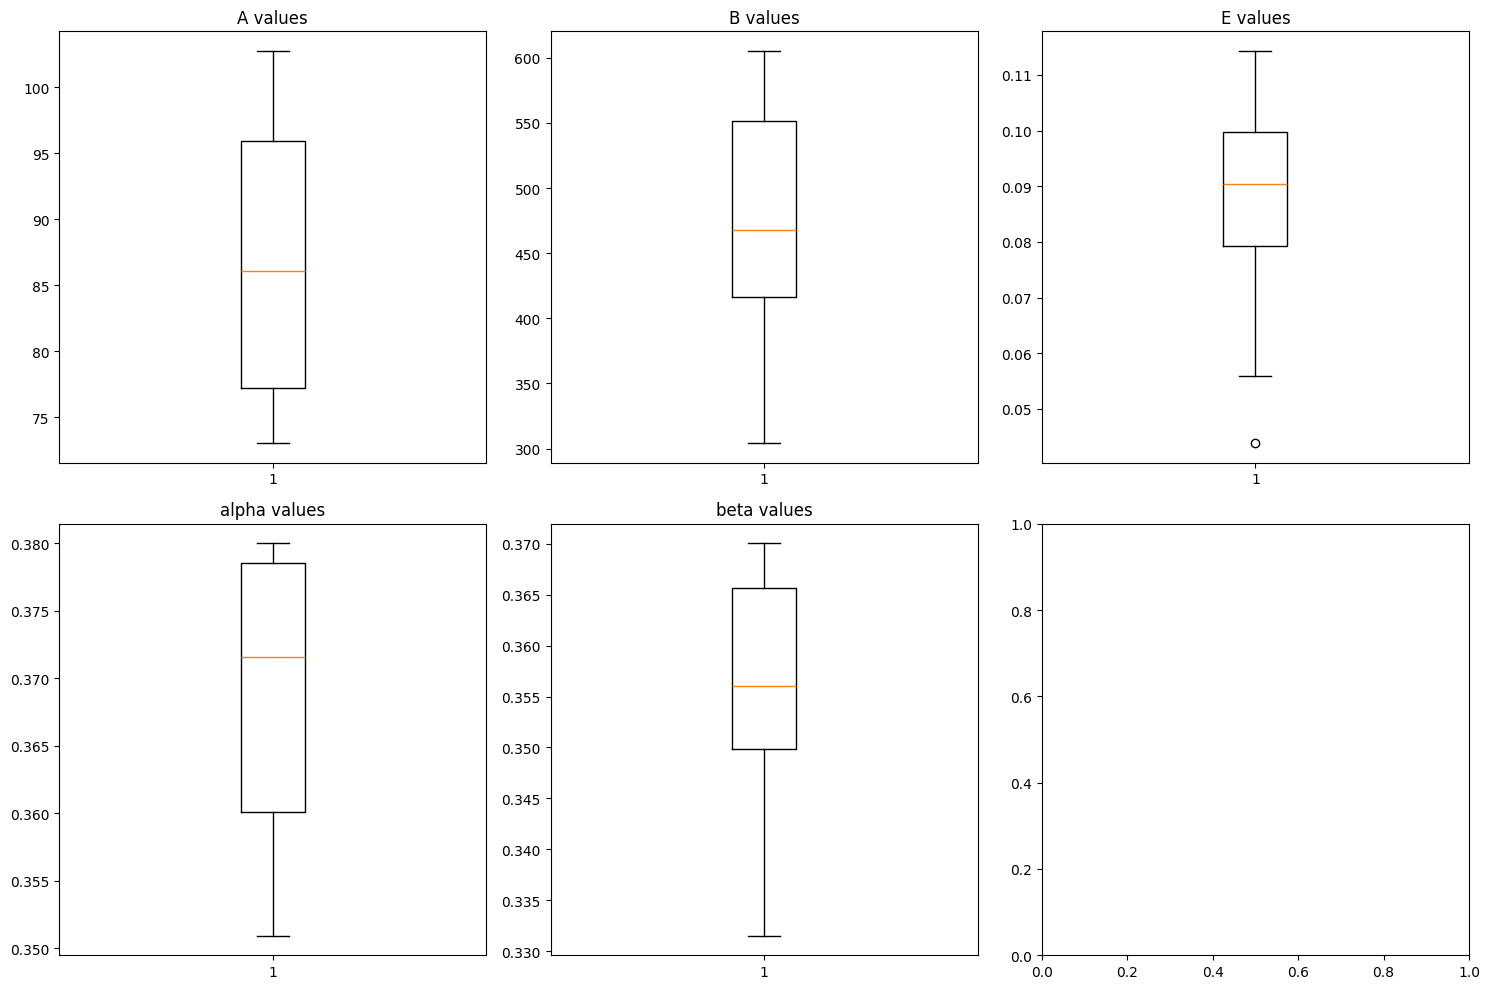

In [6]:
from math import exp
As = np.array([exp(m.a.item()) for m in models])
Bs = np.array([exp(m.b.item()) for m in models])
Es = np.array([exp(m.e.item()) for m in models])
alphas = np.array([m.alpha.item() for m in models])
betas = np.array([m.beta.item() for m in models])

# Boxplots of the parameters
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].boxplot(As)
axs[0, 0].set_title('A values')
axs[0, 1].boxplot(Bs)
axs[0, 1].set_title('B values')
axs[0, 2].boxplot(Es)
axs[0, 2].set_title('E values')
axs[1, 0].boxplot(alphas)
axs[1, 0].set_title('alpha values')
axs[1, 1].boxplot(betas)
axs[1, 1].set_title('beta values')
plt.tight_layout()
plt.show()

In [7]:
 
total_epochs = 20000
model = ScalingLaw()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=total_epochs)
for epoch in range(total_epochs):
    model.train()
    optimizer.zero_grad()
    L_pred = model(N, D)
    loss = criterion(torch.log(L_pred), torch.log(L))
    loss.backward()
    optimizer.step()
    lr_scheduler.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 0.00034700913238339126
Epoch 100, Loss: 0.0003263837716076523
Epoch 200, Loss: 0.000307516340399161
Epoch 300, Loss: 0.0002966086030937731
Epoch 400, Loss: 0.000287917471723631
Epoch 500, Loss: 0.00027997890720143914
Epoch 600, Loss: 0.00027224046061746776
Epoch 700, Loss: 0.00026429761783219874
Epoch 800, Loss: 0.00025581687805242836
Epoch 900, Loss: 0.00024678706540726125
Epoch 1000, Loss: 0.0002377908822381869
Epoch 1100, Loss: 0.000229076060350053
Epoch 1200, Loss: 0.00022058884496800601
Epoch 1300, Loss: 0.00021233686129562557
Epoch 1400, Loss: 0.00020420807413756847
Epoch 1500, Loss: 0.00019622787658590823
Epoch 1600, Loss: 0.00018835262744687498
Epoch 1700, Loss: 0.00018070716760121286
Epoch 1800, Loss: 0.00017308459791820496
Epoch 1900, Loss: 0.00016570210573263466
Epoch 2000, Loss: 0.00015833838551770896
Epoch 2100, Loss: 0.0001511559821665287
Epoch 2200, Loss: 0.0001439916086383164
Epoch 2300, Loss: 0.00013692834181711078
Epoch 2400, Loss: 0.0001299652940360829

In [8]:
preds = model(N, D)
runs_df['pred'] = preds.detach().numpy().flatten()
runs_df['error_abs'] = (runs_df['pred'] - runs_df[val_loss_col]).abs()
runs_df['error_rel'] = runs_df['error_abs'] / runs_df[val_loss_col]
runs_df[['run_name', val_loss_col, 'pred', 'error_abs', 'error_rel']].sort_values(by='error_abs', ascending=False)

,run_name,final_val_loss_MikiV_SimpleStories_SimpleStories_chunked_512,pred,error_abs,error_rel
42,cfgs/simple_stories_chartok/512/2M/1.yaml,1.858666,1.712942,0.145724,0.078402
41,cfgs/simple_stories_chartok/512/2M/2.yaml,1.531610,1.485485,0.046125,0.030115
38,cfgs/simple_stories_chartok/512/2M/4.yaml,1.135678,1.168724,0.033046,0.029098
36,cfgs/simple_stories_chartok/512/2M/5.yaml,1.028272,1.060047,0.031774,0.030901
0,cfgs/simple_stories_chartok/512/14M/1.yaml,0.759768,0.790311,0.030543,0.040201
1,cfgs/simple_stories_chartok/512/14M/5.yaml,0.505827,0.489682,0.016145,0.031918
40,cfgs/simple_stories_chartok/512/14M/2.yaml,0.669744,0.685634,0.015890,0.023725
37,cfgs/simple_stories_chartok/512/7M/2.yaml,0.875178,0.867851,0.007327,0.008372
5,cfgs/simple_stories_chartok/512/14M/4.yaml,0.544180,0.539749,0.004431,0.008142
33,cfgs/simple_stories_chartok/512/14M/3.yaml,0.599458,0.603771,0.004313,0.007195


In [9]:
A = torch.exp(model.a).item()
B = torch.exp(model.b).item()
E = torch.exp(model.e).item()
alpha = model.alpha.item()
beta = model.beta.item()
print(f"A={A}, B={B}, E={E}, alpha={alpha}, beta={beta}")

A=105.00193786621094, B=450.5355224609375, E=0.09547605365514755, alpha=0.38259562849998474, beta=0.3546740710735321


In [10]:
runs_df

,run_id,run_name,tokens_seen,compute,params,final_val_loss_MikiV_SimpleStories_SimpleStories_chunked_512,final_val_loss_ci_lower_MikiV_SimpleStories_SimpleStories_chunked_512,final_val_loss_ci_upper_MikiV_SimpleStories_SimpleStories_chunked_512,final_val_loss_MikiV_SimpleStories_SimpleStories_subchunked_256x2,final_val_loss_ci_lower_MikiV_SimpleStories_SimpleStories_subchunked_256x2,final_val_loss_ci_upper_MikiV_SimpleStories_SimpleStories_subchunked_256x2,final_val_loss_MikiV_SimpleStories_SimpleStories_subchunked_128x4,final_val_loss_ci_lower_MikiV_SimpleStories_SimpleStories_subchunked_128x4,final_val_loss_ci_upper_MikiV_SimpleStories_SimpleStories_subchunked_128x4,pred,error_abs,error_rel
0,None,cfgs/simple_stories_chartok/512/14M/1.yaml,239992832,2.885628e+15,10715224,0.759768,0.758131,0.761386,0.783319,0.781776,0.784880,0.823982,0.822577,0.825390,0.790311,0.030543,0.040201
1,None,cfgs/simple_stories_chartok/512/14M/5.yaml,3839983616,4.617123e+16,10715224,0.505827,0.504502,0.507170,0.548590,0.547237,0.549903,0.612444,0.611220,0.613660,0.489682,0.016145,0.031918
5,None,cfgs/simple_stories_chartok/512/14M/4.yaml,1919975424,2.308542e+16,10715224,0.544180,0.542756,0.545586,0.584089,0.582726,0.585440,0.644147,0.642881,0.645421,0.539749,0.004431,0.008142
10,None,cfgs/simple_stories_chartok/512/7M/5.yaml,1919975424,1.237042e+16,4784216,0.616713,0.615391,0.618175,0.652348,0.650898,0.653936,0.706715,0.705225,0.708270,0.617288,0.000575,0.000932
32,None,cfgs/simple_stories_chartok/512/7M/4.yaml,959971328,6.185103e+15,4784216,0.683746,0.682304,0.685432,0.715510,0.714052,0.717075,0.764928,0.763408,0.766433,0.681310,0.002435,0.003562
33,None,cfgs/simple_stories_chartok/512/14M/3.yaml,959971328,1.154251e+16,10715224,0.599458,0.598049,0.600933,0.635830,0.634421,0.637190,0.690768,0.689420,0.692059,0.603771,0.004313,0.007195
34,None,cfgs/simple_stories_chartok/512/7M/3.yaml,479985664,3.092551e+15,4784216,0.763294,0.761836,0.764935,0.789249,0.787662,0.790913,0.832928,0.831304,0.834520,0.763173,0.000121,0.000158
36,None,cfgs/simple_stories_chartok/512/2M/5.yaml,431980544,7.130651e+14,815960,1.028272,1.026648,1.030049,1.046522,1.044687,1.048426,1.081052,1.079291,1.082815,1.060047,0.031774,0.030901
37,None,cfgs/simple_stories_chartok/512/7M/2.yaml,239992832,1.546276e+15,4784216,0.875178,0.873729,0.876814,0.896503,0.894787,0.898267,0.934577,0.932943,0.936288,0.867851,0.007327,0.008372
38,None,cfgs/simple_stories_chartok/512/2M/4.yaml,215973888,3.565055e+14,815960,1.135678,1.133726,1.137831,1.152560,1.150621,1.154523,1.184691,1.182992,1.186406,1.168724,0.033046,0.029098


Text(0.5, 1.0, 'Validation Loss vs Compute for MikiV Simple Stories (Chunked 512)')

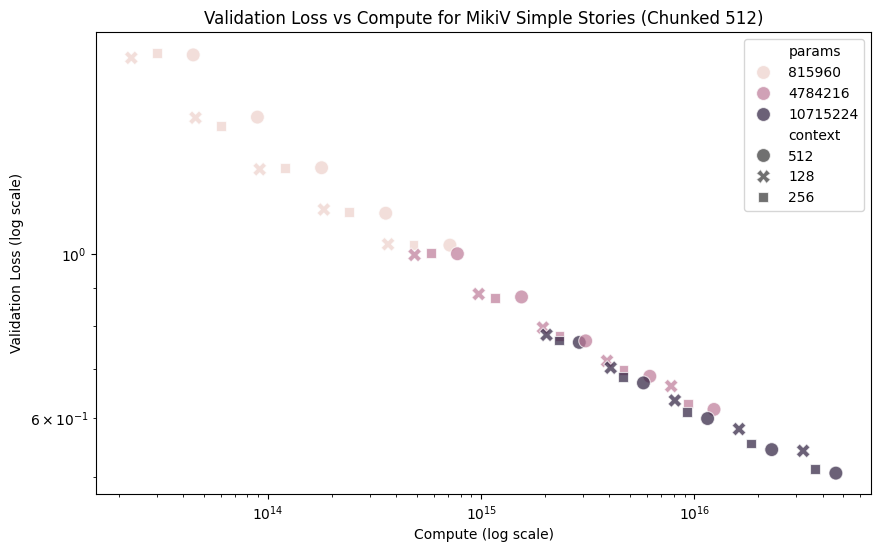

In [18]:
# plot final_val_loss_MikiV_SimpleStories_SimpleStories_chunked_512 v. compute log log
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=runs_df, x='compute', y=val_loss_col, hue
='params', style='context', s=100, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Compute (log scale)')
plt.ylabel('Validation Loss (log scale)')
plt.title('Validation Loss vs Compute for MikiV Simple Stories (Chunked 512)')